In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
import pylab
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=500)

plt.rc('text', usetex=True)
import numpy

from matplotlib import rc, rcParams

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold'}

In [2]:
from scipy.interpolate import interp1d

[[  8.03000000e+01   1.89207370e-43]
 [  9.81367474e+01   3.35981829e-43]
 [  1.00000000e+02   3.65608643e-43]
 [  1.50000000e+02   4.60316252e-43]
 [  1.76000000e+02   5.22067483e-43]
 [  2.00000000e+02   5.95498072e-43]
 [  2.09045794e+02   6.15848211e-43]
 [  3.29337783e+02   1.12883789e-42]
 [  3.50000000e+02   1.31731813e-42]
 [  4.66126908e+02   2.06913808e-42]
 [  5.00000000e+02   2.48239032e-42]
 [  6.56117827e+02   3.79269019e-42]
 [  7.50000000e+02   5.55638595e-42]
 [  8.60670577e+02   6.95192796e-42]
 [  1.00000000e+03   1.01666026e-41]
 [  1.26493236e+03   1.27427499e-41]
 [  1.73933375e+03   2.33572147e-41]
 [  1.99916890e+03   4.28133240e-41]
 [  2.00000000e+03   4.29276547e-41]
 [  2.80624194e+03   7.84759970e-41]
 [  3.00000000e+03   9.79925949e-41]
 [  3.99269729e+03   1.43844989e-40]
 [  4.95754005e+03   2.63665090e-40]
 [  5.00000000e+03   2.73696433e-40]]
17
[[  8.03000000e+01   5.18792342e-43]
 [  1.00000000e+02   5.66698901e-43]
 [  1.50000000e+02   5.10013884e-4

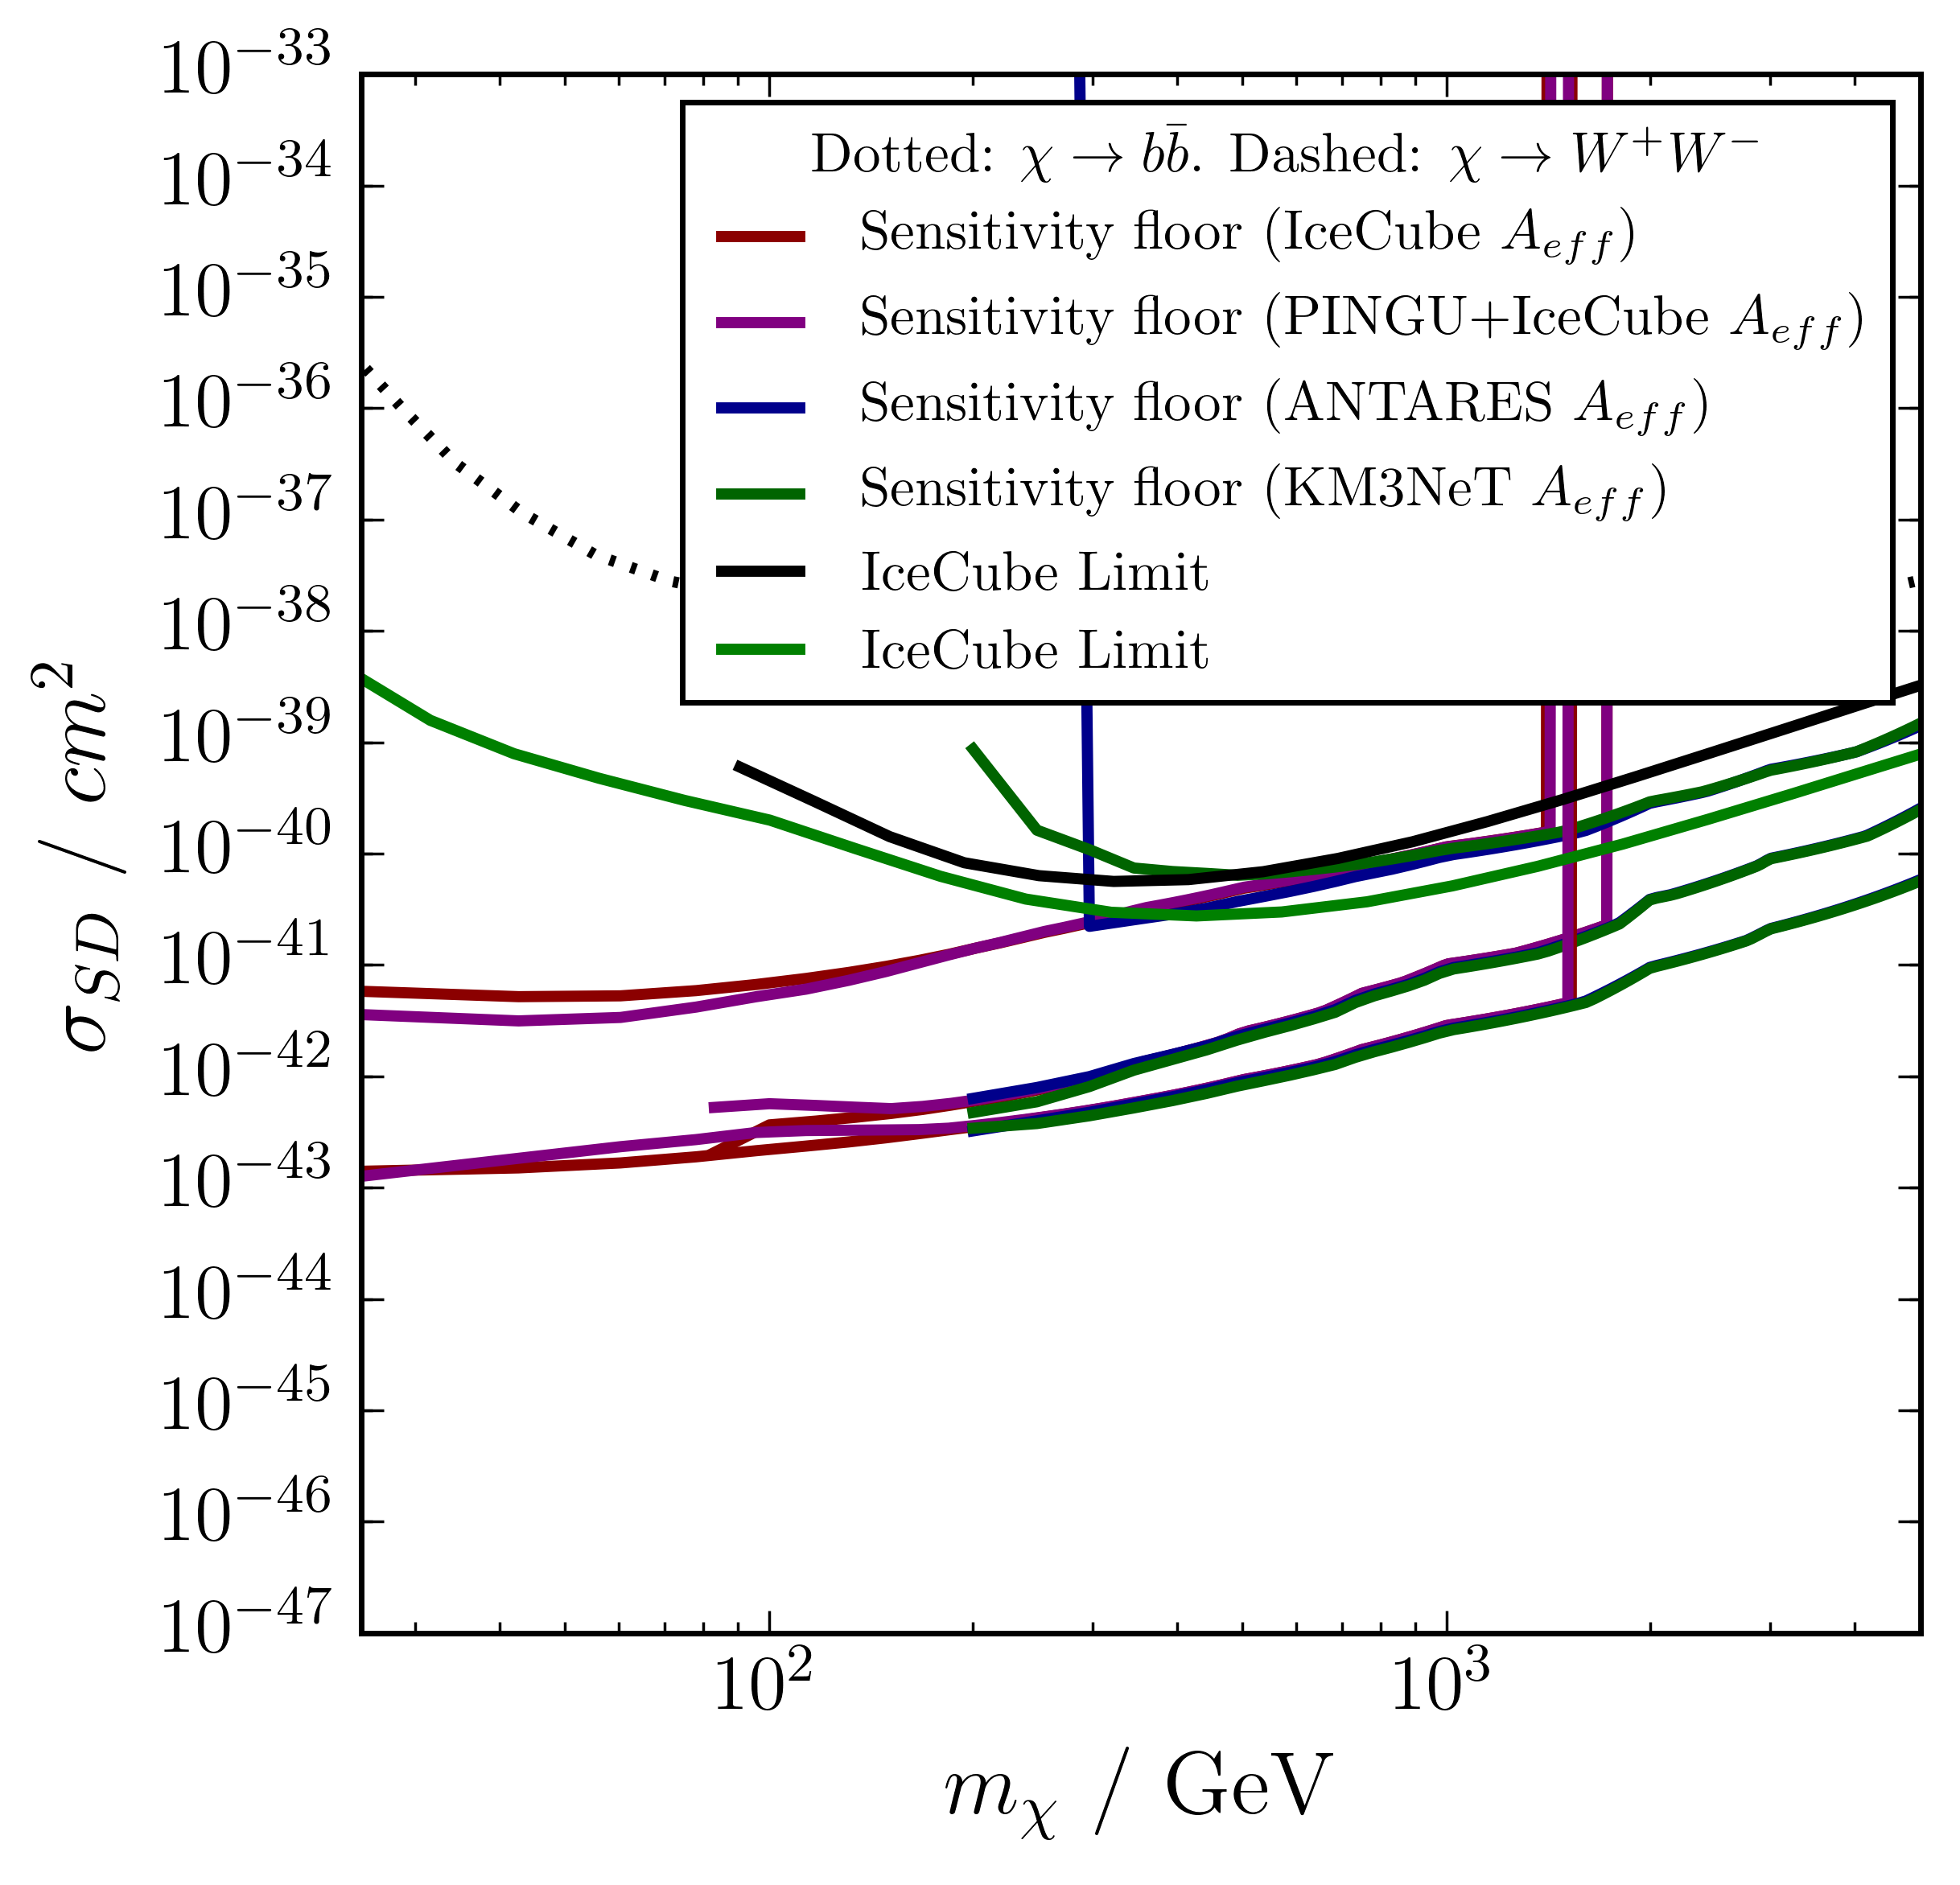

In [24]:
pylab.figure(figsize=(5,5))
EffectiveAreas=['IceCube','PINGU+IceCube','ANTARES','KM3NeT']
Colors={'IceCube':'darkred','PINGU+IceCube':'purple','ANTARES':'darkblue','KM3NeT':'darkgreen'}
LWs={'IceCube':3,'ANTARES':2,'KM3NeT':1}
Ranges={'PINGU+IceCube':[25,1775],'IceCube':[25,1775],'ANTARES':[200,5000],'KM3NeT':[200,5000]}

ContoursW={}
Contoursb={}
Contourst={}



for a in EffectiveAreas:
    ContourW=numpy.loadtxt(a+"_Contour_1_WW.txt")
    print ContourW
    todelete=[]
    for x in range(0,len(ContourW)):
        if (ContourW[x][0]<Ranges[a][0]) or (ContourW[x][0]>Ranges[a][1]):
            todelete.append(x)
    ContourW = numpy.delete(ContourW,todelete,axis=0)
    fContour=interp1d(ContourW[:,0],numpy.log10(ContourW[:,1]),fill_value=1,bounds_error=False,kind='linear')
    print len(ContourW)
    ContoursW[a]=fContour
    Range=numpy.linspace(max(83,Ranges[a][0]),Ranges[a][1],100)
    pylab.plot(Range,pow(10,fContour(Range)),color=Colors[a],linewidth=2,label=r"Sensitivity floor ("+a+r" $A_{eff})$")
    
for a in EffectiveAreas:
    Contourb=numpy.loadtxt(a+"_Contour_1_bb.txt")
    todelete=[]
    for x in range(0,len(Contourb)):
        if (Contourb[x][0]<Ranges[a][0]) or (Contourb[x][0]>Ranges[a][1]):
            todelete.append(x)
            print("Deleting",len(Contourb),a,Ranges[a][0],Ranges[a][1],Contourb[x][0])
    Contourb = numpy.delete(Contourb,todelete,axis=0)
    fContour=interp1d(Contourb[:,0],numpy.log10(Contourb[:,1]),fill_value=1,bounds_error=False,kind='linear')
    Contoursb[a]=fContour
    Range=numpy.linspace(max(25,Ranges[a][0]),Ranges[a][1],100)
    pylab.plot(Range,pow(10,fContour(Range)),color=Colors[a],linewidth=2)

for a in EffectiveAreas:
    Contourt=numpy.loadtxt(a+"_Contour_1_tt.txt")
    todelete=[]
    for x in range(0,len(Contourt)):
        if (Contourt[x][0]<Ranges[a][0]) or (Contourt[x][0]>Ranges[a][1]):
            todelete.append(x)
    Contourt = numpy.delete(Contourt,todelete,axis=0)
    fContour=interp1d(Contourt[:,0],numpy.log10(Contourt[:,1]),fill_value=1,bounds_error=False,kind='linear')
    Contourst[a]=fContour
    Range=numpy.linspace(max(25,Ranges[a][0]),Ranges[a][1],100)
    pylab.plot(Range,pow(10,fContour(Range)),color=Colors[a],linewidth=2)


pylab.loglog()

pylab.xlim(25,5000)
pylab.ylim(1e-47,1e-33)

IC79ResultWW=numpy.loadtxt("../Results/IC79ResultWW.csv",delimiter=',')
IC79Resultbb=numpy.loadtxt("../Results/IC79Resultbb.csv",delimiter=',')
IC79Resulttt=numpy.loadtxt("../Results/IC79Resulttt.csv",delimiter=',')

IC86ResultWW=numpy.loadtxt("../Results/IC86_WW.csv",delimiter=',')
IC86Resultbb=numpy.loadtxt("../Results/IC86_bb.csv",delimiter=',')
IC86Resulttt=numpy.loadtxt("../Results/IC86_tautau.csv",delimiter=',')



pylab.plot(IC79Resultbb[:,0],IC79Resultbb[:,1],':',color='black',linewidth=2)
pylab.plot(IC79ResultWW[:,0],IC79ResultWW[:,1],color='black',linewidth=2,label="IceCube Limit")
pylab.plot(IC79Resulttt[:,0],IC79Resulttt[:,1],color='green',linewidth=2,label="IceCube Limit")



pylab.xlabel(r"$m_\chi$ / GeV",fontsize=16)
pylab.ylabel(r"$\sigma_{SD}$ / $cm^2$",fontsize=16)
pylab.legend(loc='upper right',fontsize=10,title=r"Dotted: $\chi\rightarrow b\bar b$.   Dashed: $\chi\rightarrow W^+W^-$")
pylab.tick_params(axis='both', which='major', labelsize=14)

pylab.savefig('NeutrinoFloors.png',dpi=600,bbox_inches='tight')


In [18]:
Contourb=numpy.loadtxt("IceCube_Contour_1_bb.txt")


In [19]:
Contourb

array([[  2.50000000e+01,   5.79638581e-42],
       [  5.00000000e+01,   4.95114886e-42],
       [  7.85258386e+01,   5.89384317e-42],
       [  1.00000000e+02,   6.87996064e-42],
       [  1.76000000e+02,   1.17405266e-41],
       [  1.94675193e+02,   1.34134790e-41],
       [  2.00000000e+02,   1.39815329e-41],
       [  2.50000000e+02,   1.91435323e-41],
       [  3.47584366e+02,   3.05270115e-41],
       [  3.50000000e+02,   3.09830781e-41],
       [  5.00000000e+02,   4.86740669e-41],
       [  6.93991213e+02,   6.94747747e-41],
       [  7.50000000e+02,   7.92532635e-41],
       [  1.00000000e+03,   1.15227044e-40],
       [  1.41971095e+03,   1.58113883e-40],
       [  2.00000000e+03,   3.25734506e-40],
       [  2.19501140e+03,   3.59842837e-40],
       [  3.00000000e+03,   6.33795560e-40],
       [  3.76913484e+03,   8.18946853e-40],
       [  5.00000000e+03,   1.53851435e-39]])

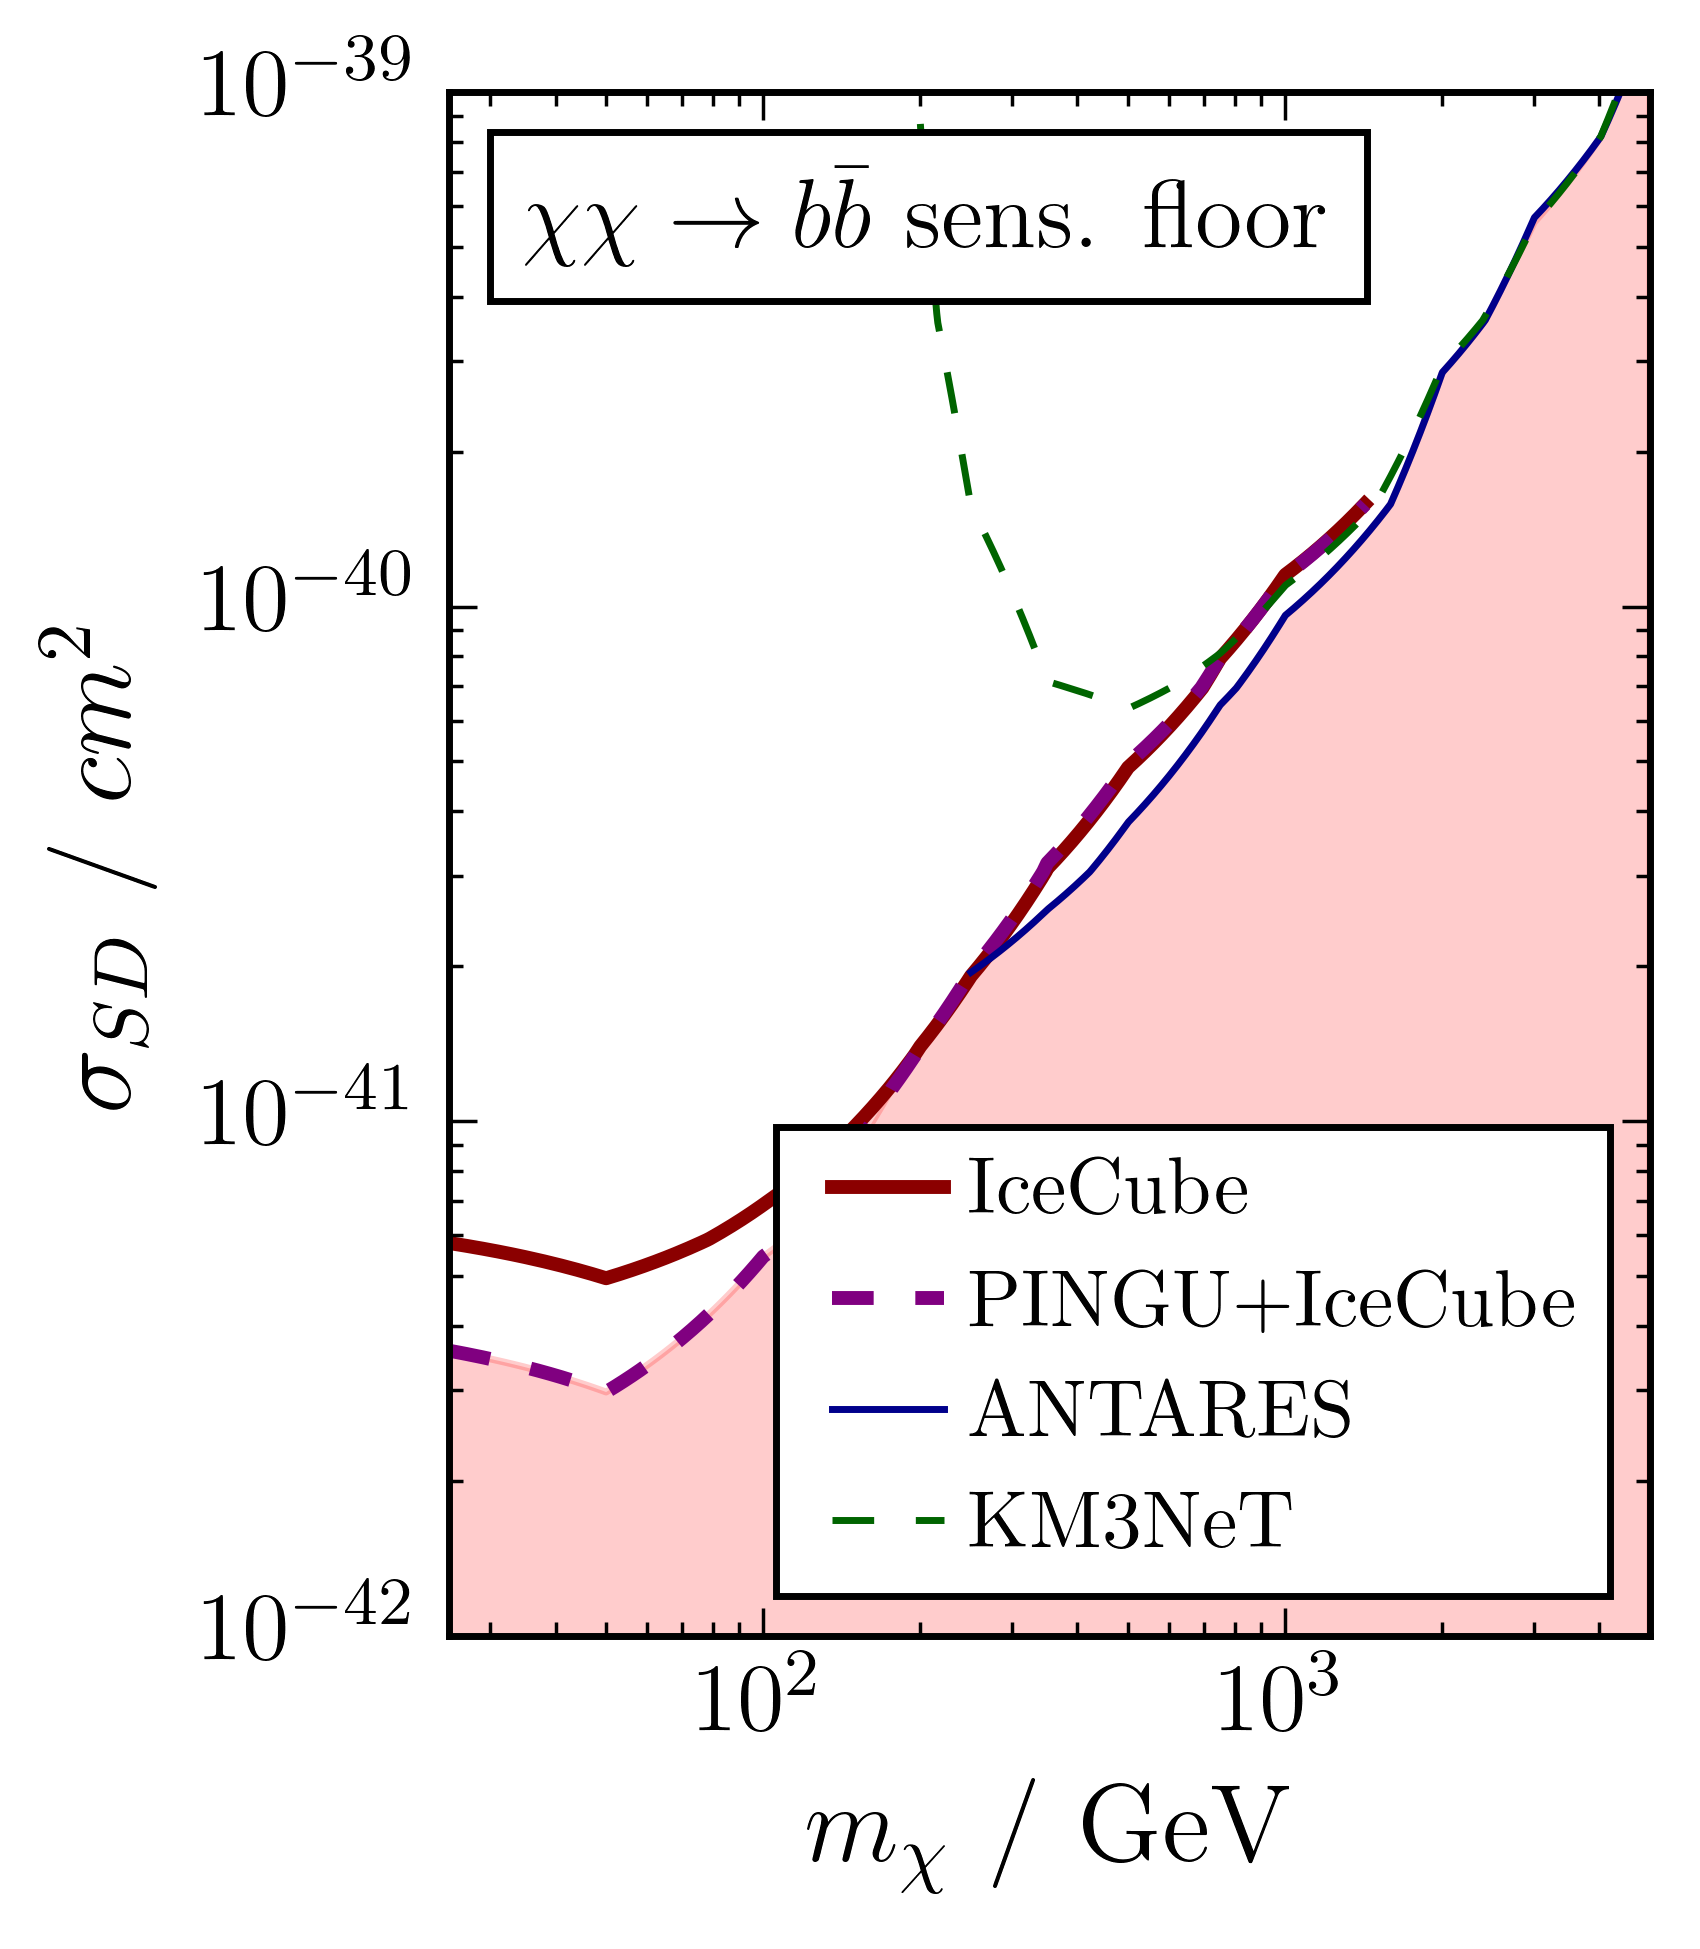

In [25]:
bFloor=[]
Rangeb=numpy.arange(25,5000,1)
for i in Rangeb:
    ThisPoint=[]
    for a in EffectiveAreas:
        ThisPoint.append(Contoursb[a](i))
    bFloor.append(min(ThisPoint))


bFloor=numpy.array(bFloor)

pylab.figure(figsize=(3.5,4))
EffectiveAreas=['IceCube','PINGU+IceCube','ANTARES','KM3NeT']
Colors={'IceCube':'darkred','PINGU+IceCube':'purple','ANTARES':'darkblue','KM3NeT':'darkgreen'}
LineStyles={'IceCube':'-','PINGU+IceCube':'--','ANTARES':'-','KM3NeT':'--'}
LineWidths={'IceCube':2,'PINGU+IceCube':2,'ANTARES':1,'KM3NeT':1}
LowCut={'IceCube':0,'PINGU+IceCube':0,'ANTARES':0,'KM3NeT':200}

for a in EffectiveAreas:
    pylab.plot(Rangeb,pow(10,Contoursb[a](Rangeb))*(Contoursb[a](Rangeb)<1),LineStyles[a],color=Colors[a],
               linewidth=LineWidths[a],label=a)



pylab.fill_between(Rangeb, numpy.ones_like(Rangeb)*1e-44,pow(10,numpy.array(bFloor))*(bFloor<0),color='red',alpha=0.2)
pylab.loglog()
pylab.ylim(1e-42,1e-39)
pylab.xlim(25,5000)

#pylab.plot(IC79Resultbb[:,0],IC79Resultbb[:,1],':',color='black',linewidth=2)
#pylab.plot(IC79ResultWW[:,0],IC79ResultWW[:,1],color='black',linewidth=2,label="IceCube Limit")
#pylab.text(200,1.2e-40,r"Below $\chi\chi\rightarrow b \bar b$ sensitivity floor",fontweight='bold')
pylab.xlabel(r"$m_\chi$ / GeV",fontsize=16)
pylab.ylabel(r"$\sigma_{SD}$ / $cm^2$",fontsize=16)
pylab.text(35,5e-40,r"$\chi\chi\rightarrow b\bar{b}$ sens. floor",bbox={'facecolor':'white', 'alpha':1, 'pad':5},ha='left',fontsize=14)
leg=pylab.legend(loc='lower right',fontsize=11.5,handletextpad=0.01)

pylab.tick_params(axis='both', which='major', labelsize=14)
pylab.tight_layout()
pylab.savefig('NeutrinoFloorsZoomedB.png',dpi=600,bbox_inches='tight')



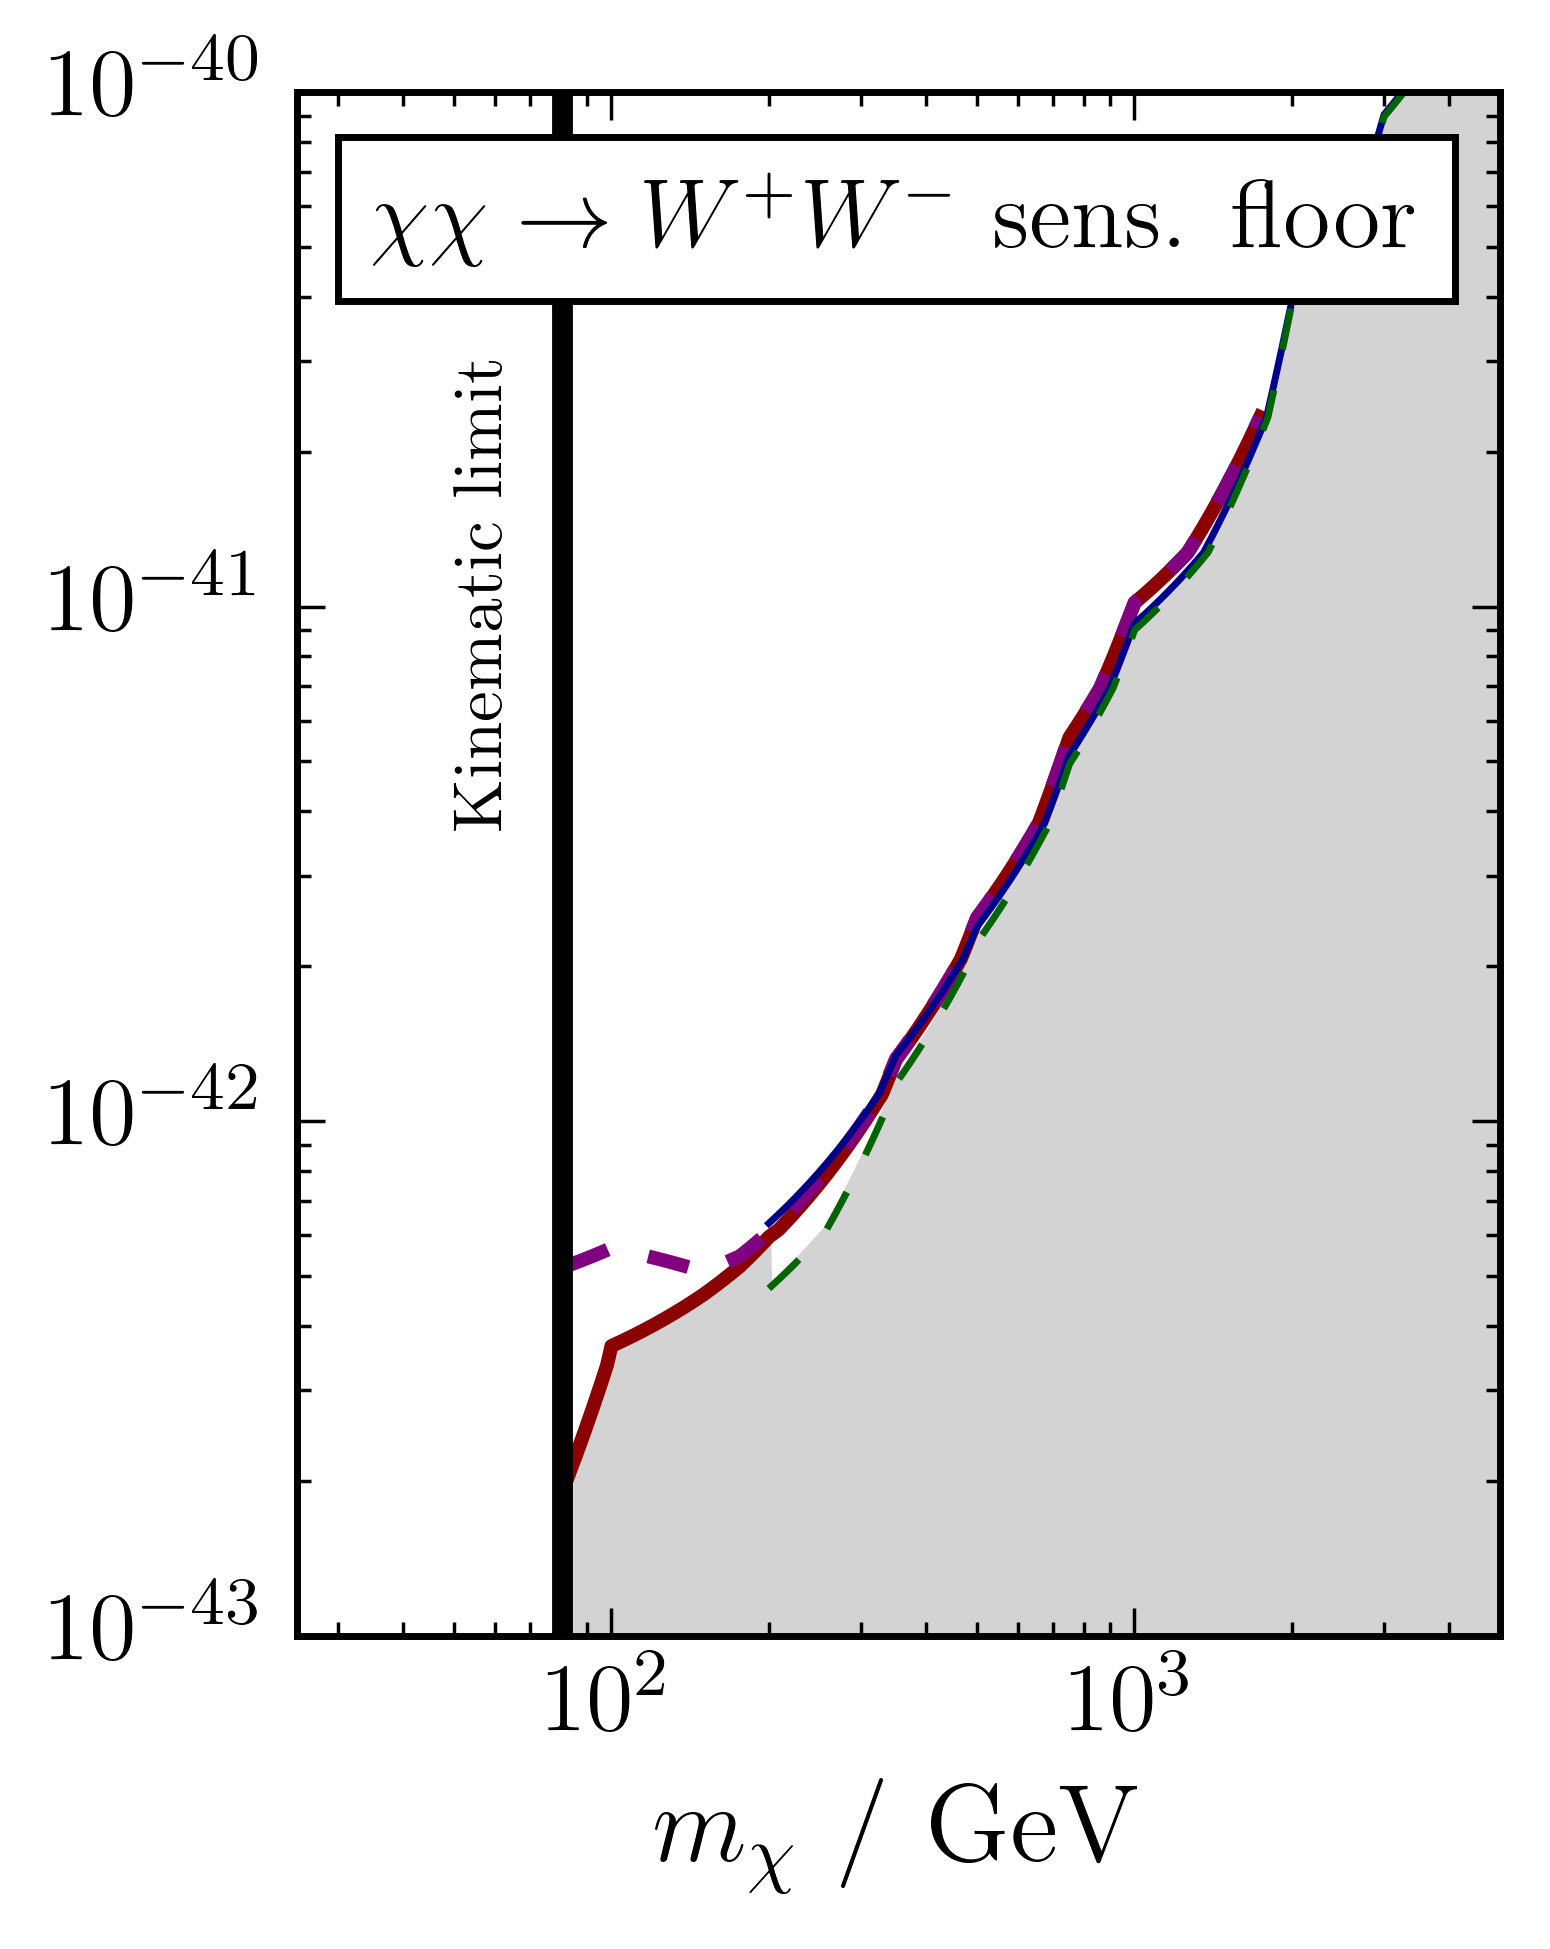

In [7]:
WFloor=[]
RangeW=numpy.arange(83,5000,1)
for i in RangeW:
    ThisPoint=[]
    for a in EffectiveAreas:
        ThisPoint.append(ContoursW[a](i))
    WFloor.append(min(ThisPoint))


WFloor=numpy.array(WFloor)

pylab.figure(figsize=(3.2,4))
EffectiveAreas=['IceCube','PINGU+IceCube','ANTARES','KM3NeT']
Colors={'IceCube':'darkred','PINGU+IceCube':'purple','ANTARES':'darkblue','KM3NeT':'darkgreen'}
LineStyles={'IceCube':'-','PINGU+IceCube':'--','ANTARES':'-','KM3NeT':'--'}
LineWidths={'IceCube':2,'PINGU+IceCube':2,'ANTARES':1,'KM3NeT':1}
LowCut={'IceCube':0,'PINGU+IceCube':0,'ANTARES':0,'KM3NeT':200}

for a in EffectiveAreas:
    pylab.plot(RangeW,pow(10,ContoursW[a](RangeW))*(ContoursW[a](RangeW)<1),LineStyles[a],color=Colors[a],linewidth=LineWidths[a],label=a+r" $A_{eff}$")



pylab.fill_between(RangeW, numpy.ones_like(RangeW)*1e-43,pow(10,numpy.array(WFloor))*(WFloor<0),color='lightgrey')
pylab.loglog()
pylab.ylim(1e-43,1e-40)
pylab.xlim(25,5000)
pylab.plot([80.3,80.3],[1e-43,1e-39],'-',color='black',linewidth=3)
pylab.text(50,25e-42,"Kinematic limit",rotation='vertical')


pylab.xlabel(r"$m_\chi$ / GeV",fontsize=16)
#pylab.ylabel(r"$\sigma_{SD}$ / $cm^2$",fontsize=16)
pylab.text(35,5e-41,r"$\chi\chi\rightarrow W^+W^-$ sens. floor",bbox={'facecolor':'white', 'alpha':1, 'pad':5},ha='left',fontsize=14)
#pylab.legend(loc='lower right',fontsize=10)
pylab.tick_params(axis='both', which='major', labelsize=14)
pylab.tight_layout()
pylab.savefig('NeutrinoFloorsZoomedW.png',dpi=600,bbox_inches='tight')




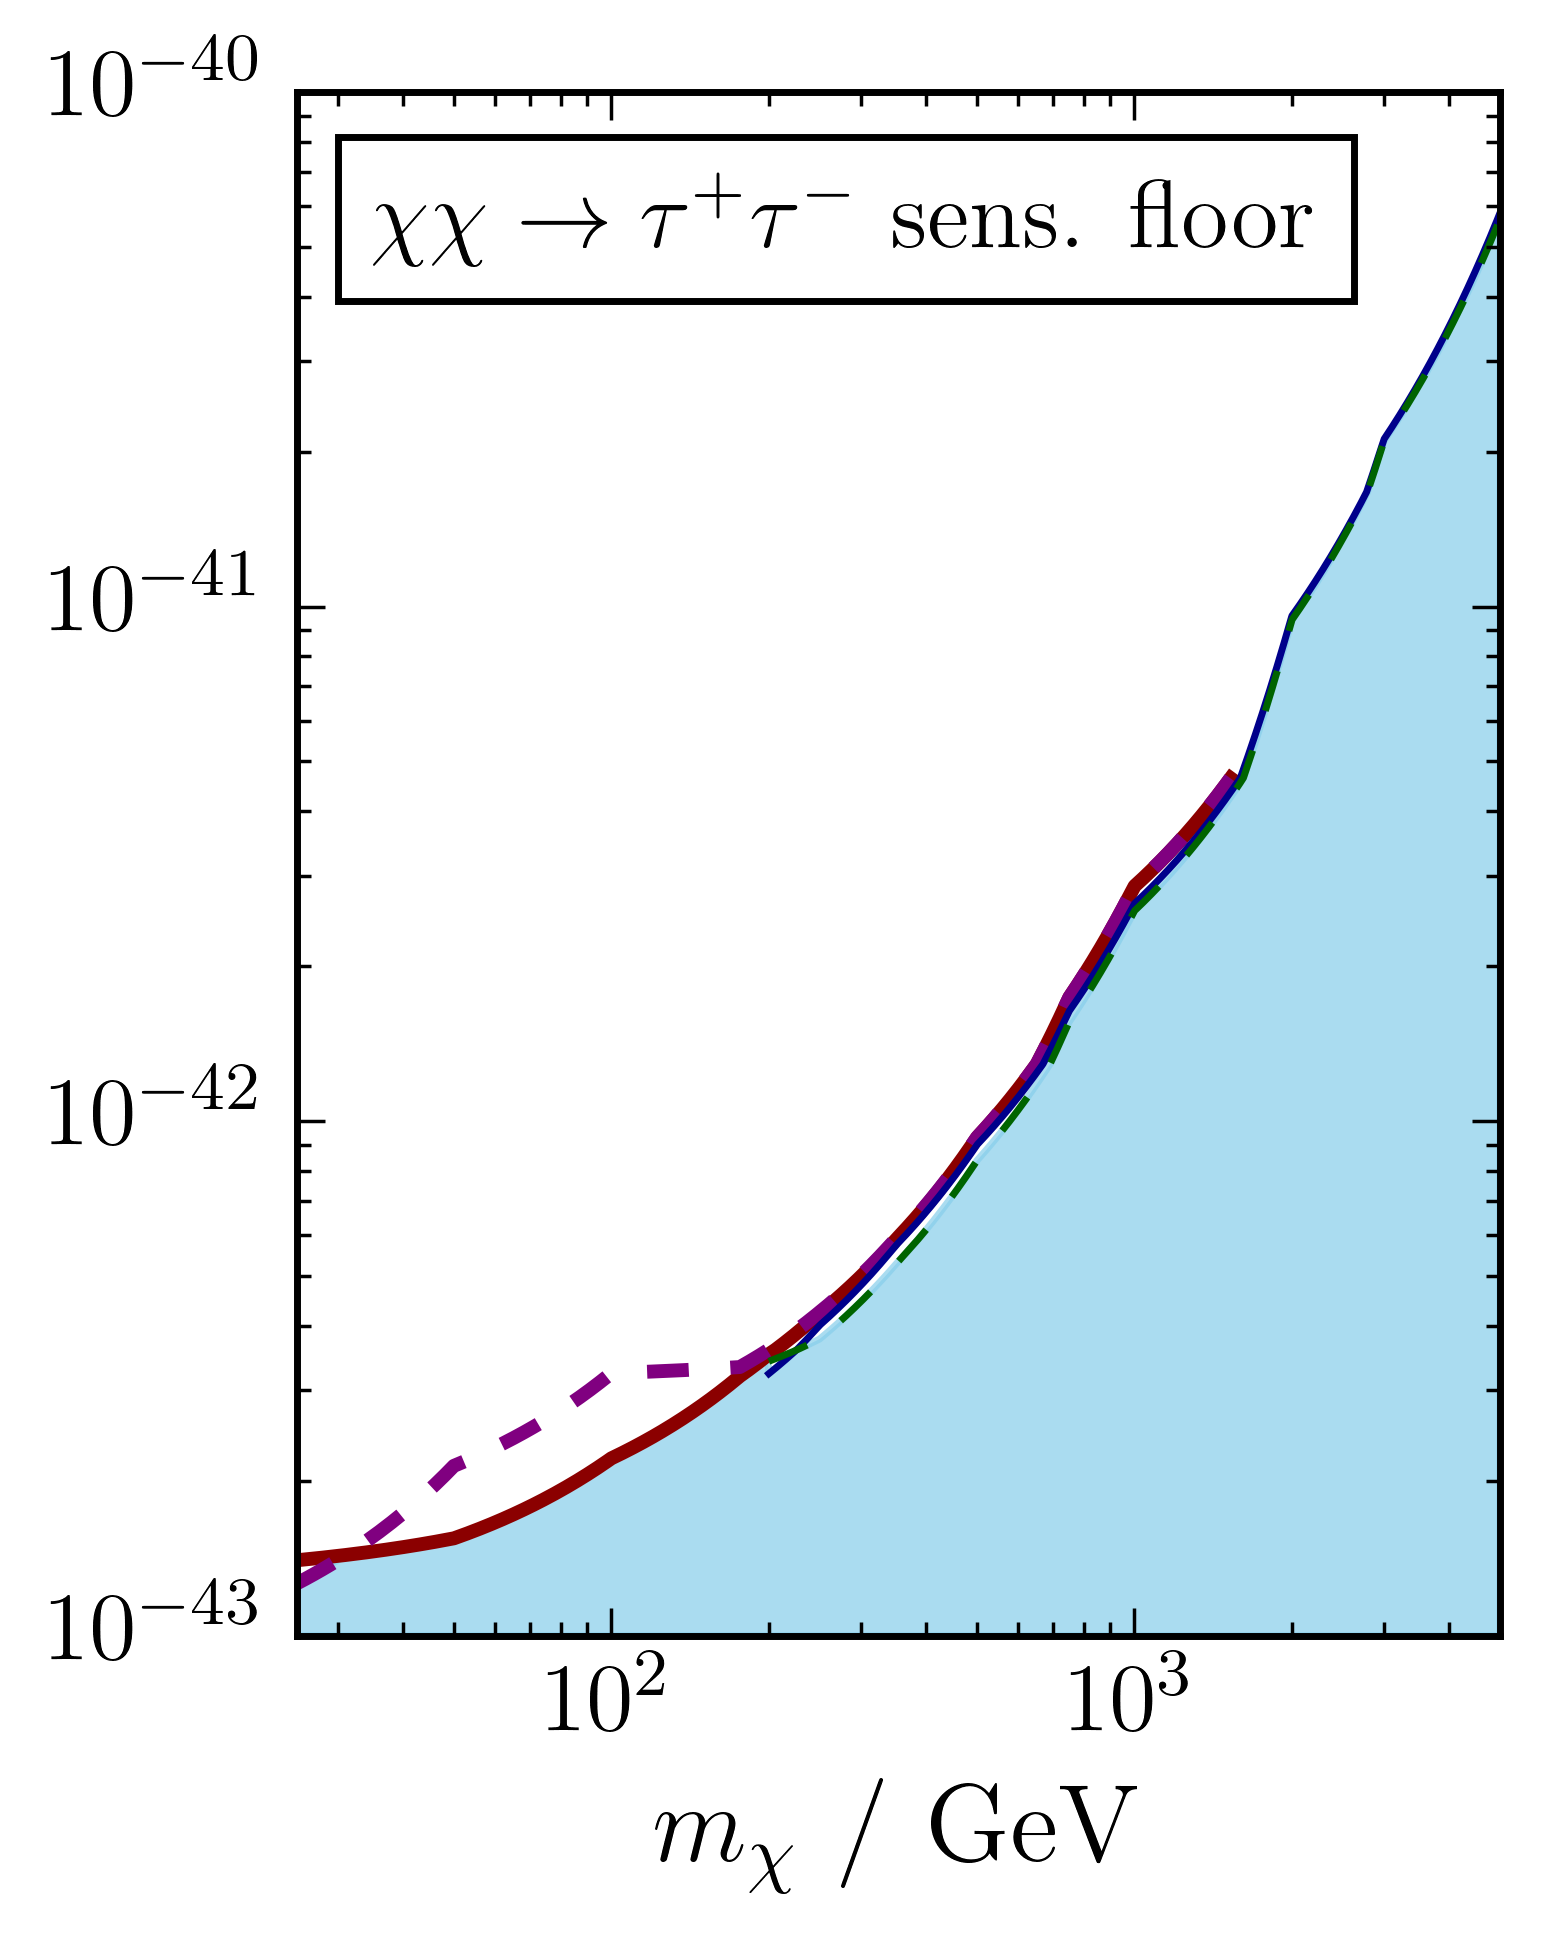

In [26]:
tFloor=[]
Ranget=numpy.arange(25,5000,1)
for i in Ranget:
    ThisPoint=[]
    for a in EffectiveAreas:
        ThisPoint.append(Contourst[a](i))
    tFloor.append(min(ThisPoint))


tFloor=numpy.array(tFloor)

pylab.figure(figsize=(3.2,4))
EffectiveAreas=['IceCube','PINGU+IceCube','ANTARES','KM3NeT']
Colors={'IceCube':'darkred','PINGU+IceCube':'purple','ANTARES':'darkblue','KM3NeT':'darkgreen'}
LineStyles={'IceCube':'-','PINGU+IceCube':'--','ANTARES':'-','KM3NeT':'--'}
LineWidths={'IceCube':2,'PINGU+IceCube':2,'ANTARES':1,'KM3NeT':1}
LowCut={'IceCube':0,'PINGU+IceCube':0,'ANTARES':0,'KM3NeT':200}

for a in EffectiveAreas:
    pylab.plot(Ranget,pow(10,Contourst[a](Rangeb))*(Contourst[a](Ranget)<1),LineStyles[a],color=Colors[a],linewidth=LineWidths[a],label=a+r" $A_{eff}$")



pylab.fill_between(Ranget, numpy.ones_like(Ranget)*1e-43,pow(10,numpy.array(tFloor))*(tFloor<0),color='skyblue',alpha=0.7)
pylab.loglog()
pylab.ylim(1e-43,1e-40)
pylab.xlim(25,5000)

pylab.xlabel(r"$m_\chi$ / GeV",fontsize=16)
#pylab.ylabel(r"$\sigma_{SD}$ / $cm^2$",fontsize=16)
pylab.text(35,5e-41,r"$\chi\chi\rightarrow \tau^+\tau^-$ sens. floor",bbox={'facecolor':'white', 'alpha':1, 'pad':5},ha='left',fontsize=14)
#pylab.legend(loc='lower right',fontsize=10)
pylab.tick_params(axis='both', which='major', labelsize=14)
pylab.tight_layout()
pylab.savefig('NeutrinoFloorsZoomedt.png',dpi=600,bbox_inches='tight')




In [12]:
Contoursb.keys()

['IceCube', 'PINGU+IceCube']

In [ ]:
WFloor=[]
bFloor=[]
RangeW=numpy.arange(83,5000,1)
Rangeb=numpy.arange(25,5000,1)
for i in Rangeb:
    ThisPoint=[]
    for a in EffectiveAreas:
        ThisPoint.append(Contoursb[a](i))
    bFloor.append(min(ThisPoint))
for i in RangeW:
    ThisPoint=[]
    for a in EffectiveAreas:
        ThisPoint.append(ContoursW[a](i))
    WFloor.append(min(ThisPoint))

WFloor=numpy.array(WFloor)
bFloor=numpy.array(bFloor)

pylab.figure(figsize=(5,5))
EffectiveAreas=['IceCube','PINGU+IceCube','ANTARES','KM3NeT']
Colors={'IceCube':'darkred','PINGU+IceCube':'purple','ANTARES':'darkblue','KM3NeT':'darkgreen'}
LWs={'IceCube':3,'ANTARES':2,'KM3NeT':1}
LowCut={'IceCube':0,'PINGU+IceCube':0,'ANTARES':0,'KM3NeT':200}

for a in EffectiveAreas:
    pylab.plot(Rangeb,pow(10,Contoursb[a](Rangeb))*(Contoursb[a](Rangeb)<1),':',color=Colors[a],linewidth=2)
    pylab.plot(RangeW,pow(10,ContoursW[a](RangeW))*(ContoursW[a](RangeW)<1),color=Colors[a],linewidth=2,label=a+r" $A_{eff}$")



pylab.fill_between(Rangeb, numpy.ones_like(Rangeb)*1e-40,pow(10,numpy.array(bFloor))*(bFloor<0),color='red',alpha=0.2)
pylab.fill_between(RangeW, numpy.ones_like(RangeW)*1e-42,pow(10,numpy.array(WFloor))*(WFloor<0),color='lightgrey',alpha=1)
pylab.loglog()
pylab.ylim(1e-42,1e-38)
pylab.xlim(25,5000)
pylab.plot([25,5000],[1e-40,1e-40],'-',color='black')

#pylab.plot(IC79Resultbb[:,0],IC79Resultbb[:,1],':',color='black',linewidth=2)
#pylab.plot(IC79ResultWW[:,0],IC79ResultWW[:,1],color='black',linewidth=2,label="IceCube Limit")
pylab.text(200,1.2e-40,r"Below $\chi\chi\rightarrow b \bar b$ sensitivity floor",fontweight='bold')
pylab.text(200,1.2e-42,r"Below $\chi\chi\rightarrow W^+W^-$ sensitivity floor",fontweight='bold')
pylab.xlabel(r"$m_\chi$ / GeV",fontsize=16)
pylab.ylabel(r"$\sigma_{SD}$ / $cm^2$",fontsize=16)
pylab.legend(loc='upper left',fontsize=10,title=r"Solid: $\chi\chi\rightarrow W^+W^-$. Dotted: $\chi\chi\rightarrow b \bar b$")
pylab.tick_params(axis='both', which='major', labelsize=14)
pylab.savefig('NeutrinoFloorsZoomed.png',dpi=600,bbox_inches='tight')




/Users/jonesb/.env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


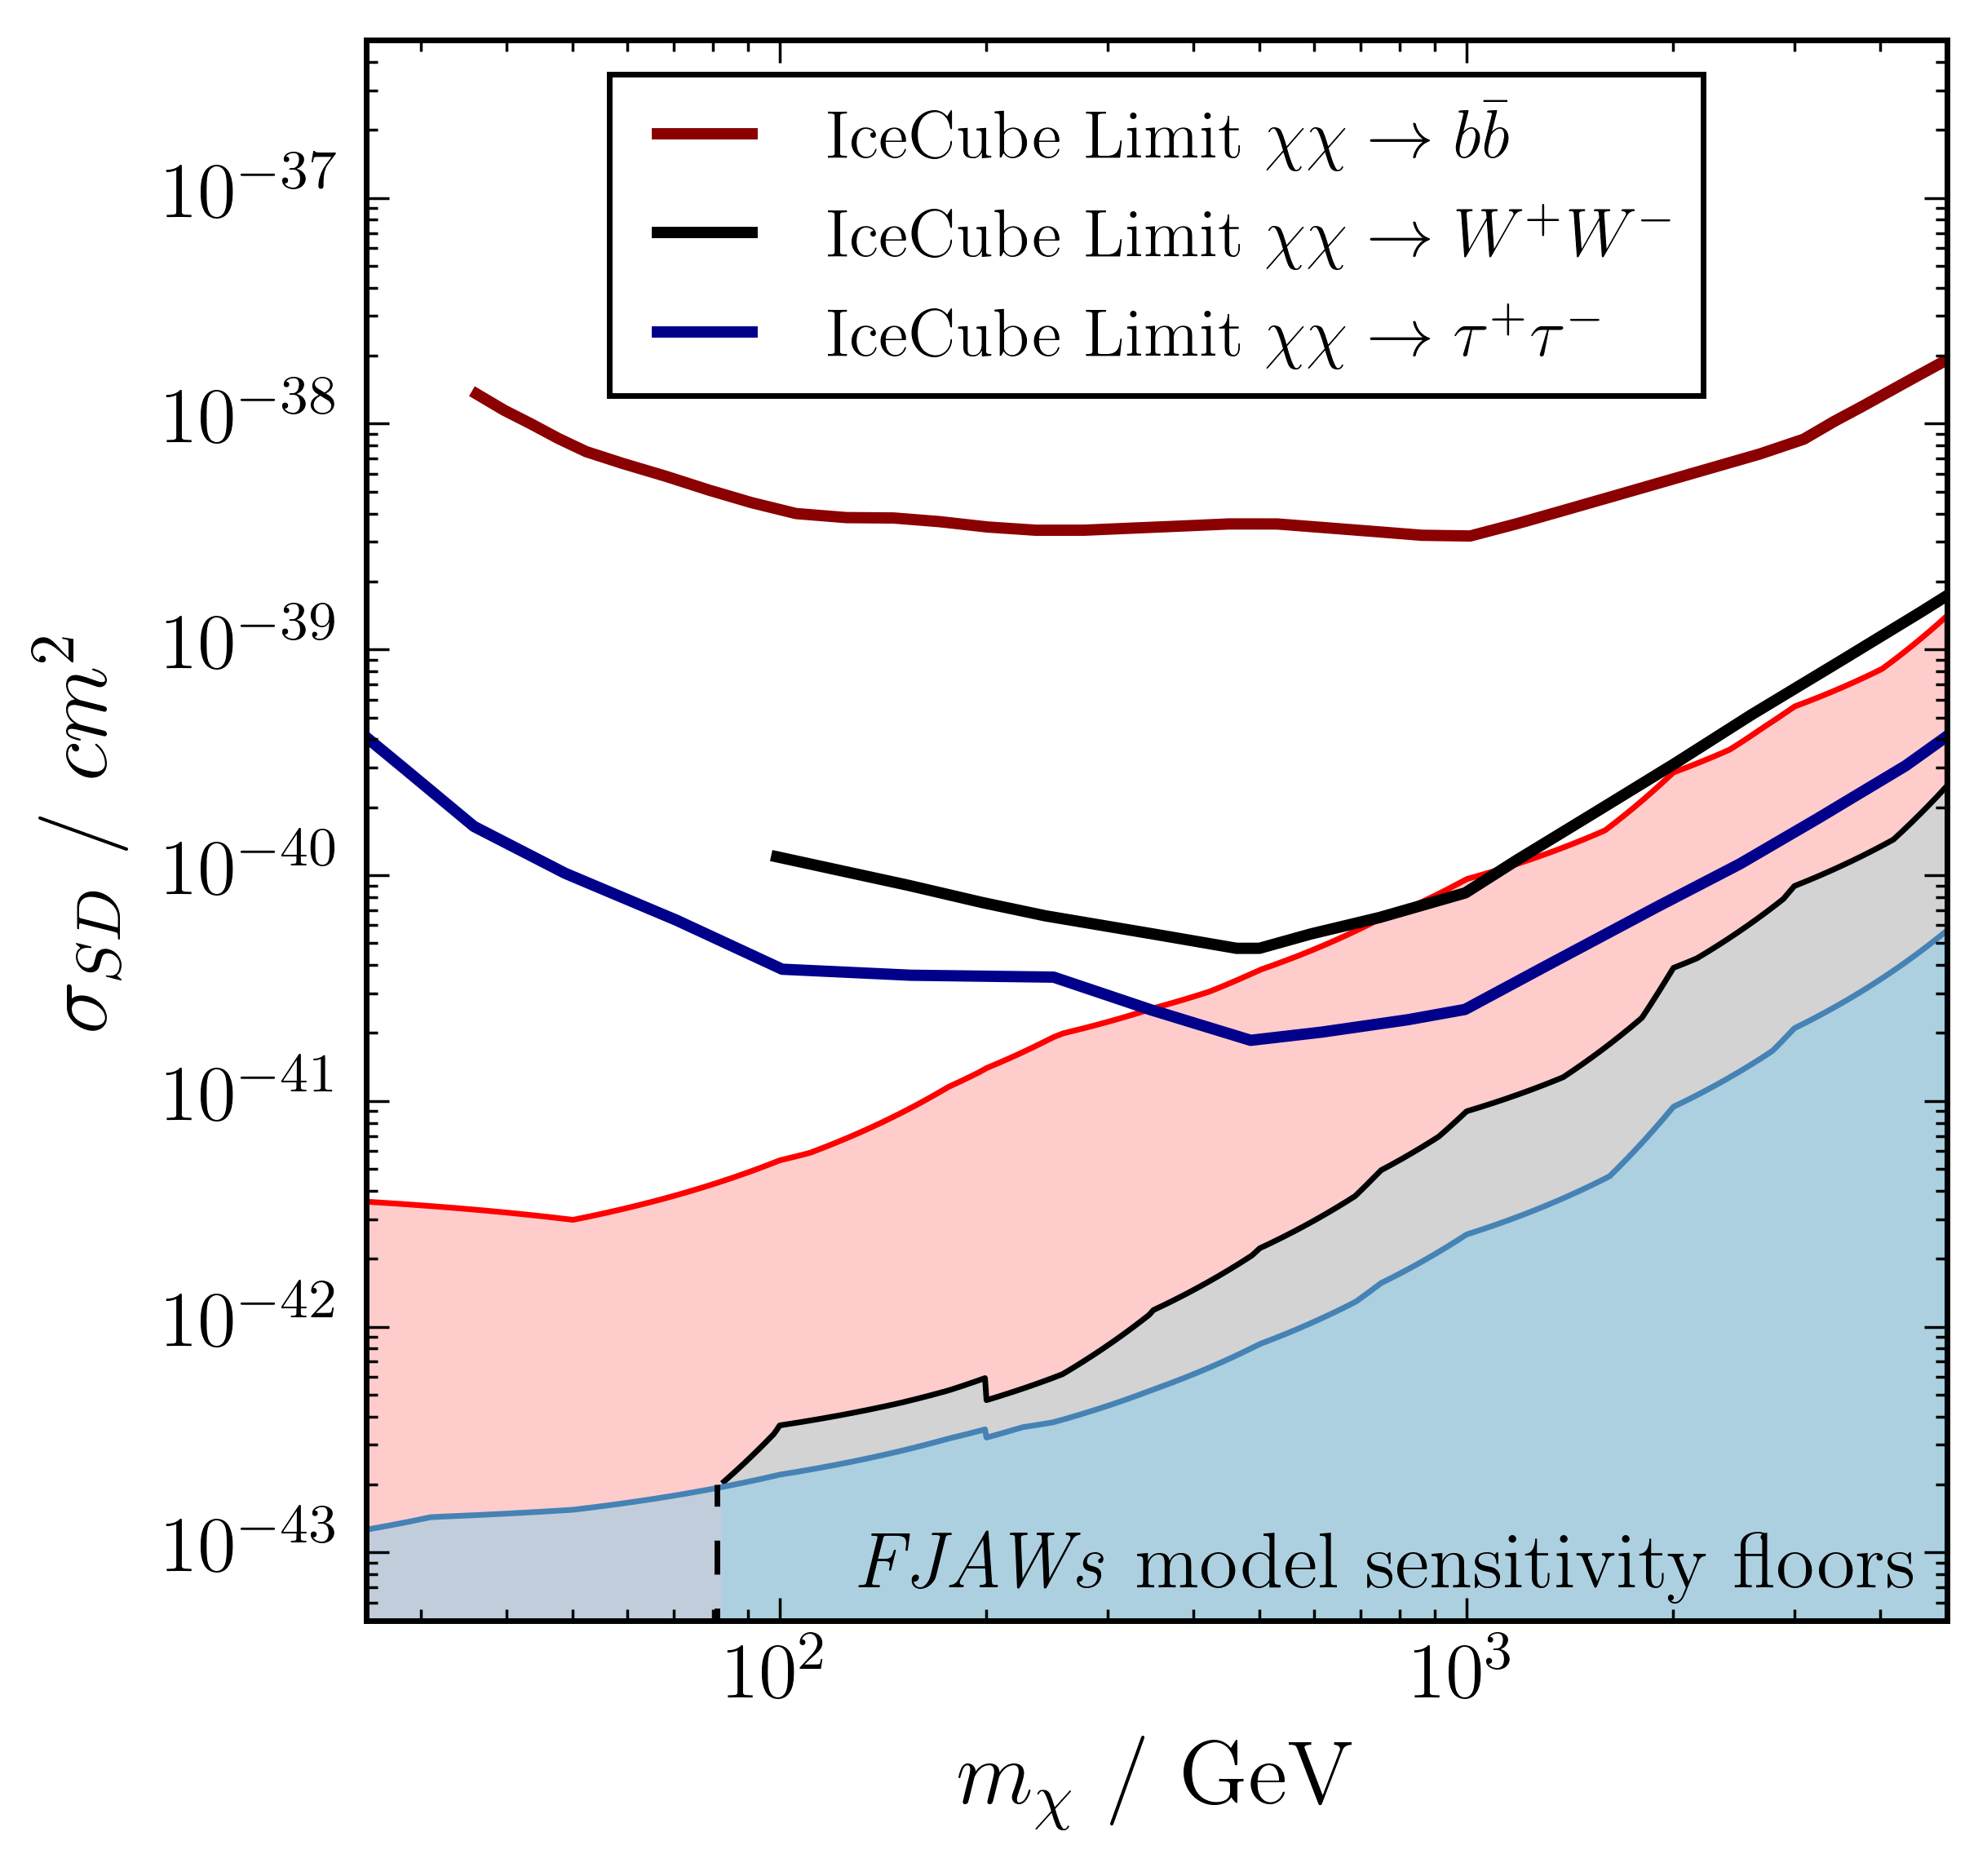

In [27]:
pylab.figure(figsize=(5,5))


pylab.plot(RangeW, pow(10,numpy.array(WFloor))*(WFloor<0),'-',color='black')
pylab.plot(Rangeb, pow(10,numpy.array(bFloor))*(bFloor<0),'-',color='red')
pylab.plot(Ranget, pow(10,numpy.array(tFloor))*(tFloor<0),'-',color='steelblue')




pylab.loglog()
pylab.ylim(5e-44,5e-37)
pylab.xlim(25,5000)

pylab.plot([81,81],[1e-44,2e-43],'--',color='black')

#pylab.plot(IC79Resultbb[:,0],IC79Resultbb[:,1],':',color='black',linewidth=2)
#pylab.plot(IC79ResultWW[:,0],IC79ResultWW[:,1],color='black',linewidth=2,label="IceCube Limit")
pylab.xlabel(r"$m_\chi$ / GeV",fontsize=16)
pylab.ylabel(r"$\sigma_{SD}$ / $cm^2$",fontsize=16)
pylab.legend(loc='upper left',fontsize=10,title=r"Solid: $\chi\rightarrow W^+W^-$. Dotted: $\chi\rightarrow b \bar b$")
pylab.tick_params(axis='both', which='major', labelsize=14)

#pylab.plot(IC79Resultbb[:,0],IC79Resultbb[:,1],color='darkred',linewidth=2,label=r"IceCube Limit $\chi\chi\rightarrow b \bar b$")
#pylab.plot(IC79ResultWW[:,0],IC79ResultWW[:,1],color='black',linewidth=2,label=r"IceCube Limit $\chi\chi\rightarrow W^+W^-$")
#pylab.plot(IC79Resulttt[:,0],IC79Resulttt[:,1],color='darkblue',linewidth=2,label=r"IceCube Limit $\chi\chi\rightarrow \tau^+\tau^-$")

pylab.plot(IC86Resultbb[:,0],IC86Resultbb[:,1],color='darkred',linewidth=2,label=r"IceCube Limit $\chi\chi\rightarrow b \bar b$")
pylab.plot(IC86ResultWW[:,0],IC86ResultWW[:,1],color='black',linewidth=2,label=r"IceCube Limit $\chi\chi\rightarrow W^+W^-$")
pylab.plot(IC86Resulttt[:,0],IC86Resulttt[:,1],color='darkblue',linewidth=2,label=r"IceCube Limit $\chi\chi\rightarrow \tau^+\tau^-$")



pylab.fill_between(Rangeb, numpy.ones_like(Rangeb)*1e-47,pow(10,numpy.array(bFloor))*(bFloor<0),color='red',alpha=0.2)
pylab.fill_between(RangeW, numpy.ones_like(RangeW)*1e-47,pow(10,numpy.array(WFloor))*(WFloor<0),color='lightgrey',alpha=1)
pylab.fill_between(Ranget, numpy.ones_like(Ranget)*1e-47,pow(10,numpy.array(tFloor))*(tFloor<0),color='skyblue',alpha=0.5)


pylab.text(130,1.4e-44*5,r"\emph{ FJAWs} model sensitivity floors ",fontweight='bold',fontsize=14)
pylab.legend(loc='upper center')

pylab.tick_params(axis='both', which='major', labelsize=14)

pylab.savefig('NeutrinoFloors.png',dpi=600,bbox_inches='tight')




In [ ]:
IC86Resultbb

In [ ]:
pylab.figure(figsize=(5,5))
pylab.plot(Ranget, pow(10,numpy.array(tFloor))*(tFloor<0),'--',color='black',linewidth=2)
pylab.xlim(5,1e4)
pylab.ylim(1e-43,1e-37)
pylab.loglog()
pylab.yticks([])
pylab.xticks([])

In [ ]:
pylab.figure(figsize=(5,5))
pylab.plot(Rangeb, pow(10,numpy.array(bFloor))*(bFloor<0),'--',color='black',linewidth=2)
pylab.xlim(5,1e4)
pylab.ylim(1e-43,1e-37)
pylab.loglog()
pylab.yticks([])
pylab.xticks([])